In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
df = pd.read_csv('BBBY.csv', parse_dates=True)

In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
df1 = df.iloc[:100]

In [5]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-23,4.59,5.06,4.59,4.91,4.91,12392200
1,2020-04-24,4.96,5.27,4.90,5.23,5.23,11371100
2,2020-04-27,5.46,6.89,5.44,6.41,6.41,34331400
3,2020-04-28,7.01,7.69,6.57,6.65,6.65,43899900
4,2020-04-29,6.82,6.98,6.47,6.59,6.59,13953500
...,...,...,...,...,...,...,...
95,2020-09-08,11.52,11.66,11.21,11.32,11.32,5978500
96,2020-09-09,11.53,11.53,11.05,11.42,11.42,4771500
97,2020-09-10,12.03,12.65,11.76,11.98,11.98,15614400
98,2020-09-11,12.05,12.15,11.64,12.04,12.04,4889800


In [6]:
close_price = df1['Close']

In [7]:
#store the values of the Date and the closing price into the pandas dataframe
df1 = pd.DataFrame({'Date': close_price.index, 'ClosePrice': close_price.values})
df1

,Date,ClosePrice
0,0,4.91
1,1,5.23
2,2,6.41
3,3,6.65
4,4,6.59
...,...,...
95,95,11.32
96,96,11.42
97,97,11.98
98,98,12.04


In [8]:
#reshaped the Data
df1.shape[0]/10 

10.0

In [9]:
#Grouping by Date
df1.groupby(['Date']).count() #Grouping by the date

,ClosePrice
Date,
0,1
1,1
2,1
3,1
4,1
...,...
95,1
96,1
97,1


In [10]:
#read closing price for each day

df1_count = pd.DataFrame(df1.groupby(['Date']).count()['ClosePrice'])

df1_count

,ClosePrice
Date,
0,1
1,1
2,1
3,1
4,1
...,...
95,1
96,1
97,1


In [11]:
# reorganize by day
c_price = np.array(df1['ClosePrice']).reshape(10,10)

c_price 

array([[ 4.91,  5.23,  6.41,  6.65,  6.59,  6.19,  5.64,  5.91,  5.58,
         5.64],
       [ 5.78,  6.46,  6.2 ,  5.86,  5.45,  5.35,  5.79,  6.28,  5.95,
         5.95],
       [ 6.8 ,  6.7 ,  7.49,  7.69,  7.47,  7.27,  7.5 ,  7.55,  8.08,
         8.73],
       [ 9.32,  9.86,  9.09,  8.26,  7.46,  8.1 ,  8.37,  9.64,  9.72,
        10.1 ],
       [ 9.84,  9.97, 10.24,  9.35,  9.48, 10.05, 10.82, 10.6 , 10.64,
        10.81],
       [10.76, 10.24, 10.41,  7.86,  8.2 ,  7.73,  8.39,  8.88,  9.47,
         9.22],
       [ 8.89,  9.43, 10.  , 10.16, 10.14, 10.53, 10.35, 10.85, 10.96,
        10.82],
       [11.05, 11.43, 11.77, 12.  , 12.11, 12.66, 11.93, 12.12, 12.34,
        12.35],
       [12.87, 12.2 , 12.2 , 11.47, 11.67, 12.27, 12.32, 12.18, 11.91,
        12.09],
       [12.18, 13.04, 12.44, 11.83, 11.75, 11.32, 11.42, 11.98, 12.04,
        12.69]])

In [12]:
#convert into dataframe
convert = pd.DataFrame(c_price, columns=np.arange(0,10,1))

convert

,0,1,2,3,4,5,6,7,8,9
0,4.91,5.23,6.41,6.65,6.59,6.19,5.64,5.91,5.58,5.64
1,5.78,6.46,6.20,5.86,5.45,5.35,5.79,6.28,5.95,5.95
2,6.80,6.70,7.49,7.69,7.47,7.27,7.50,7.55,8.08,8.73
3,9.32,9.86,9.09,8.26,7.46,8.10,8.37,9.64,9.72,10.10
4,9.84,9.97,10.24,9.35,9.48,10.05,10.82,10.60,10.64,10.81
5,10.76,10.24,10.41,7.86,8.20,7.73,8.39,8.88,9.47,9.22
6,8.89,9.43,10.00,10.16,10.14,10.53,10.35,10.85,10.96,10.82
7,11.05,11.43,11.77,12.00,12.11,12.66,11.93,12.12,12.34,12.35
8,12.87,12.20,12.20,11.47,11.67,12.27,12.32,12.18,11.91,12.09
9,12.18,13.04,12.44,11.83,11.75,11.32,11.42,11.98,12.04,12.69


In [13]:
# Reshape for Standardizing Data
convert_1 = np.array(convert).ravel().reshape(-1,1)

convert_1.shape

(100, 1)

## Standardize the values

In [14]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(convert_1)

In [15]:
## Reshape the data 
reshaped = scaled_data.reshape(10,10)

reshaped.shape

(10, 10)

In [16]:
#Pandas version of the reshaped data
pd.DataFrame(reshaped, columns=np.arange(0,10,1))

,0,1,2,3,4,5,6,7,8,9
0,-1.921683,-1.784646,-1.279323,-1.176546,-1.202240,-1.373536,-1.609068,-1.493443,-1.634762,-1.609068
1,-1.549114,-1.257911,-1.369254,-1.514855,-1.690434,-1.733258,-1.544832,-1.334995,-1.476314,-1.476314
2,-1.112310,-1.155134,-0.816825,-0.731177,-0.825389,-0.911037,-0.812542,-0.791130,-0.564163,-0.285807
3,-0.033146,0.198104,-0.131641,-0.487080,-0.829672,-0.555598,-0.439974,0.103891,0.138150,0.300881
4,0.189539,0.245210,0.360835,-0.020299,0.035373,0.279469,0.609214,0.515001,0.532131,0.604931
5,0.583519,0.360835,0.433636,-0.658376,-0.512774,-0.714047,-0.431409,-0.221571,0.031090,-0.075970
6,-0.217289,0.013961,0.258057,0.326576,0.318011,0.485024,0.407941,0.622061,0.669167,0.609214
7,0.707709,0.870440,1.016042,1.114537,1.161643,1.397175,1.084560,1.165926,1.260138,1.264421
8,1.487105,1.200185,1.200185,0.887570,0.973218,1.230162,1.251574,1.191620,1.075995,1.153078
9,1.191620,1.559906,1.302962,1.041736,1.007477,0.823334,0.866158,1.105972,1.131666,1.410022


# Split the Data


In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(reshaped, test_size=0.3)

train.shape

In [19]:
train[:2]

array([[-1.92168307, -1.78464635, -1.27932344, -1.1765459 , -1.20224028,
        -1.37353619, -1.60906805, -1.49344332, -1.63476244, -1.60906805],
       [ 0.70770902,  0.87044012,  1.01604164,  1.11453678,  1.16164316,
         1.39717502,  1.08456   ,  1.16592555,  1.2601383 ,  1.2644207 ]])

In [20]:
test.shape

(3, 10)

# Create Input and Target values

In [21]:
train_inputs = train[:,:9]


pd.DataFrame(train_inputs, columns=np.arange(0,9,1))

,0,1,2,3,4,5,6,7,8
0,-1.921683,-1.784646,-1.279323,-1.176546,-1.202240,-1.373536,-1.609068,-1.493443,-1.634762
1,0.707709,0.870440,1.016042,1.114537,1.161643,1.397175,1.084560,1.165926,1.260138
2,-1.112310,-1.155134,-0.816825,-0.731177,-0.825389,-0.911037,-0.812542,-0.791130,-0.564163
3,1.191620,1.559906,1.302962,1.041736,1.007477,0.823334,0.866158,1.105972,1.131666
4,0.189539,0.245210,0.360835,-0.020299,0.035373,0.279469,0.609214,0.515001,0.532131
5,-0.033146,0.198104,-0.131641,-0.487080,-0.829672,-0.555598,-0.439974,0.103891,0.138150
6,-0.217289,0.013961,0.258057,0.326576,0.318011,0.485024,0.407941,0.622061,0.669167


In [22]:
train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(7, 9, 1)

In [23]:
train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,-1.609068
1,1.264421
2,-0.285807
3,1.410022
4,0.604931
5,0.300881
6,0.609214


In [24]:
test_inputs = test[:,:9]

In [25]:
test_x = test_inputs[:,:,np.newaxis]

test_x.shape

(3, 9, 1)

## Set the target

In [26]:
# The last column (9) is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,1.153078
1,-1.476314
2,-0.075970


# Simple RNN

In [27]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [28]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.6432
Epoch 2/30
1/1 [==============================] - 0s 16ms/step - loss: 0.6147
Epoch 3/30
1/1 [==============================] - 0s 27ms/step - loss: 0.5891
Epoch 4/30
1/1 [==============================] - 0s 8ms/step - loss: 0.5645
Epoch 5/30
1/1 [==============================] - 0s 15ms/step - loss: 0.5412
Epoch 6/30
1/1 [==============================] - 0s 13ms/step - loss: 0.5186
Epoch 7/30
1/1 [==============================] - 0s 13ms/step - loss: 0.4968
Epoch 8/30
1/1 [==============================] - 0s 18ms/step - loss: 0.4759
Epoch 9/30
1/1 [==============================] - 0s 16ms/step - loss: 0.4560
Epoch 10/30
1/1 [==============================] - 0s 19ms/step - loss: 0.4369
Epoch 11/30
1/1 [==============================] - 0s 8ms/step - loss: 0.4190
Epoch 12/30
1/1 [==============================] - 0s 19ms/step - loss: 0.4019
Epoch 13/30
1/1 [==============================] - 0s 11ms/step -

### Predictions

In [29]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 372ms/step


In [30]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()
comparison

,actual,predicted
0,12.09,10.760000
1,5.95,6.183376
2,9.22,9.340603


In [31]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.61263631589863

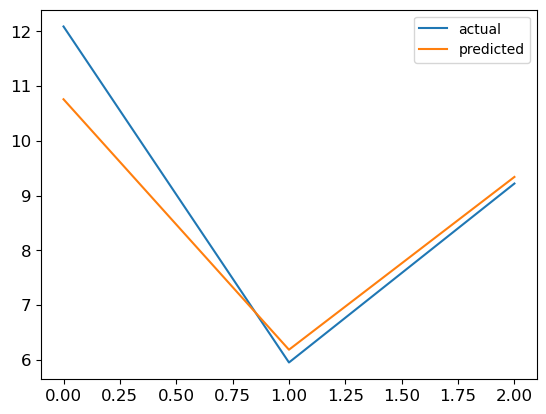

In [32]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

In [33]:
# LSTM with more layers

In [34]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [35]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.8803
Epoch 2/30
1/1 [==============================] - 0s 16ms/step - loss: 0.8602
Epoch 3/30
1/1 [==============================] - 0s 13ms/step - loss: 0.8403
Epoch 4/30
1/1 [==============================] - 0s 16ms/step - loss: 0.8206
Epoch 5/30
1/1 [==============================] - 0s 15ms/step - loss: 0.8012
Epoch 6/30
1/1 [==============================] - 0s 18ms/step - loss: 0.7820
Epoch 7/30
1/1 [==============================] - 0s 23ms/step - loss: 0.7630
Epoch 8/30
1/1 [==============================] - 0s 21ms/step - loss: 0.7440
Epoch 9/30
1/1 [==============================] - 0s 15ms/step - loss: 0.7251
Epoch 10/30
1/1 [==============================] - 0s 16ms/step - loss: 0.7063
Epoch 11/30
1/1 [==============================] - 0s 16ms/step - loss: 0.6877
Epoch 12/30
1/1 [==============================] - 0s 18ms/step - loss: 0.6694
Epoch 13/30
1/1 [==============================] - 0s 14ms/step

### Predictions

In [36]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 360ms/step


In [37]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()
comparison

,actual,predicted
0,12.09,11.646945
1,5.95,8.635406
2,9.22,9.474399


In [38]:
mean_squared_error(comparison['actual'], comparison['predicted'])

2.490808142117404

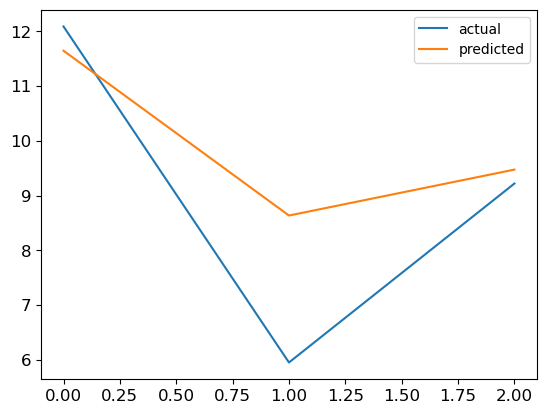

In [39]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# GRU (with more layers)

In [40]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [41]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 6s 6s/step - loss: 1.0162
Epoch 2/30
1/1 [==============================] - 0s 32ms/step - loss: 0.9197
Epoch 3/30
1/1 [==============================] - 0s 22ms/step - loss: 0.8605
Epoch 4/30
1/1 [==============================] - 0s 21ms/step - loss: 0.8124
Epoch 5/30
1/1 [==============================] - 0s 21ms/step - loss: 0.7696
Epoch 6/30
1/1 [==============================] - 0s 16ms/step - loss: 0.7307
Epoch 7/30
1/1 [==============================] - 0s 24ms/step - loss: 0.6936
Epoch 8/30
1/1 [==============================] - 0s 23ms/step - loss: 0.6579
Epoch 9/30
1/1 [==============================] - 0s 21ms/step - loss: 0.6236
Epoch 10/30
1/1 [==============================] - 0s 26ms/step - loss: 0.5896
Epoch 11/30
1/1 [==============================] - 0s 18ms/step - loss: 0.5565
Epoch 12/30
1/1 [==============================] - 0s 23ms/step - loss: 0.5238
Epoch 13/30
1/1 [==============================] - 0s 25ms/step

### Predictions

In [42]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 805ms/step


In [43]:
#Remember, these are standardized values. 

comparision = pd.DataFrame()

comparision['actual'] = scaler.inverse_transform([test_target]).flatten()
comparision['predicted'] = scaler.inverse_transform(y_pred).flatten()
comparison

,actual,predicted
0,12.09,11.646945
1,5.95,8.635406
2,9.22,9.474399


In [44]:
mean_squared_error(comparison['actual'], comparison['predicted'])

2.490808142117404

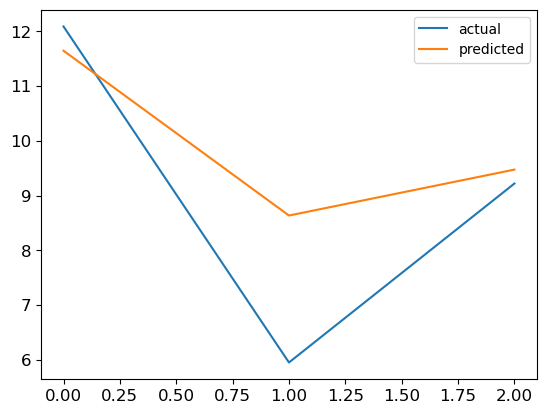

In [45]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conv1D

In [46]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [47]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 7s 7s/step - loss: 1.0585
Epoch 2/30
1/1 [==============================] - 0s 24ms/step - loss: 1.0123
Epoch 3/30
1/1 [==============================] - 0s 22ms/step - loss: 0.9709
Epoch 4/30
1/1 [==============================] - 0s 21ms/step - loss: 0.9311
Epoch 5/30
1/1 [==============================] - 0s 20ms/step - loss: 0.8928
Epoch 6/30
1/1 [==============================] - 0s 23ms/step - loss: 0.8585
Epoch 7/30
1/1 [==============================] - 0s 25ms/step - loss: 0.8251
Epoch 8/30
1/1 [==============================] - 0s 24ms/step - loss: 0.7927
Epoch 9/30
1/1 [==============================] - 0s 18ms/step - loss: 0.7600
Epoch 10/30
1/1 [==============================] - 0s 22ms/step - loss: 0.7272
Epoch 11/30
1/1 [==============================] - 0s 31ms/step - loss: 0.6952
Epoch 12/30
1/1 [==============================] - 0s 23ms/step - loss: 0.6633
Epoch 13/30
1/1 [==============================] - 0s 21ms/step

### Predictions

In [48]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 1s/step


In [49]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()
comparison

,actual,predicted
0,12.09,10.998363
1,5.95,5.959792
2,9.22,8.915267


In [50]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.42820945075203304

From the above reults we got the mean squaree error as 0.42 for convolution model which is low when compared to RNN,GRU models .So, we can say Convultion model performmed better in predicting closing stock prices.
